<a href="https://colab.research.google.com/github/Abdoul-K-S/ML/blob/master/diabete_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import urllib.request
import os

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [11]:
#load data
data_path = os.path.join("datasets", "")
data_exam = pd.read_csv(data_path + '/diabetes2.csv')
data_exam.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Get the parameters of the model

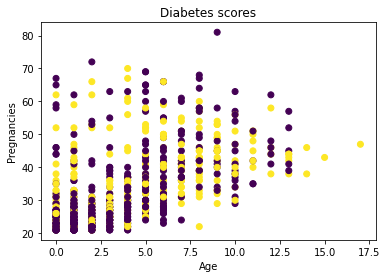

In [27]:
X = np.c_[data_exam[["Pregnancies","Age"]]]
y = np.c_[data_exam["Outcome"]]

(m,n) = X.shape

# display all examples
fig = plt.figure()
plt.title('Diabetes scores')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.scatter(X[:,0],X[:,1], c=y.ravel())
plt.show()

#add a column of 1s to X
#X = np.insert(X, 0, values=1, axis=1)

wj = clf.coef_, w0 = clf.intercept_

In [13]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y.ravel())

#print model parameters
print("w0 =", clf.intercept_[0], ", w1 = ", clf.coef_[0][0], ", w2 = ", clf.coef_[0][1])

w0 = -4.192072617333958 , w1 =  0.061406995714592114 , w2 =  0.01756756049155251


Plot the decision boundary

The decision boundary correspends to the value y=0.5. We can write x2 in terms of x1 by solving the following equation:
0.5=w0+w1∗x1+w2∗x2

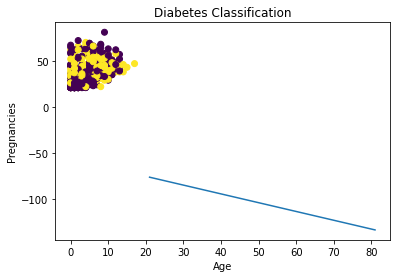

In [28]:
fig = plt.figure()
ax = plt.axes()
plt.title('Diabetes Classification')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.scatter(X[:,0], X[:,1], c=y.ravel())

#generate new points to plot a decision boundary line
x1_vals = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
# the boundry is at line at y = 0.5, we can then write x2 in terms of x1 (0.5 = theta0 + theta1*x1 + theta2*x2)
x2_vals = -(clf.intercept_[0] - 0.5 + clf.coef_[0][0]*x1_vals) / clf.coef_[0][1]

# plot the line
plt.plot(x1_vals, x2_vals)
plt.show()

Accuracy of the model

the score function measures how well the learned model predicts on a given set. 

In [15]:
#prediction probability of one example (the 5th example)
clf.predict_proba(X[5:6,:]) # the two probabilities sums up to 1.

#predicted class of an example (class with max probability)
clf.predict(X[5:6,:])

#prediction accuracy on the training set X
clf.score(X, y)

0.7825520833333334

Part 2: Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression using the ridge method to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

Load and Visualize the data

Similarly to the previous part, we will load and plot the data of the two QA test scores. The positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

In [16]:
data_microchip = pd.read_csv('datasets/diabetes2.csv')
data_microchip.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
X = np.c_[data_microchip[["Pregnancies", "Age"]]]
y = np.c_[data_microchip["Outcome"]]

(m,n) = X.shape

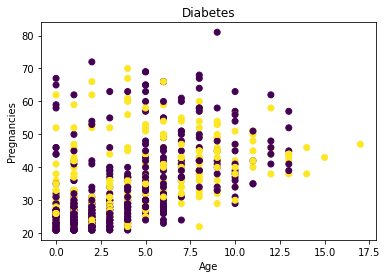

In [18]:
X1 = X[:,0]
X2 = X[:,1]

# display
fig = plt.figure()
plt.title('Diabetes')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.scatter(X1,X2, c=y.ravel())
plt.show()

Feature mapping

The scatter plot shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

One way to fit the data better is to create more features from each data point. Sklearn provide you with such transformation. PolynomialFeatures allow you to map the features into all polynomial terms of x1 and x2 up to the order power order:
(1,x1,x2,x21,x22,x1x2,x31,x21x2,x22x1,x32,...,xorder2)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

order = 30

poly = PolynomialFeatures(order)
Xmap = poly.fit_transform(X)

print(X.shape)
print(Xmap.shape)

(768, 2)
(768, 496)


As a result of a six order power mapping (order=6), our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

fit a logistic regression model to the polynomial features

In [20]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=10**7).fit(Xmap, y.ravel())
w_star = clf.coef_[0]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Plot the decision boundary

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning:

No contour levels were found within the data range.

No handles with labels found to put in legend.


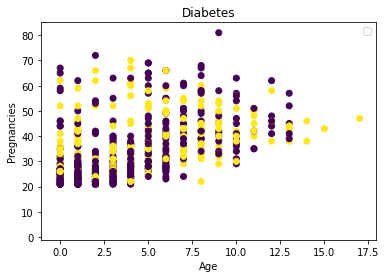

In [21]:
def get_boundary(u, v, theta, order):
    boundary = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            
            poly = PolynomialFeatures(order)
            uv = [np.array([u[i],v[j]])]
            poly_map = poly.fit_transform([np.array([u[i],v[j]])])
            boundary[i, j] = (poly_map[0].dot(np.array(theta)))

    return boundary

#plot data and boundary
fig = plt.figure()

u = np.linspace(-1.1, 1.1, 50)
v = np.linspace(-1.1, 1.1, 50)

boundary = get_boundary(u, v, w_star, order)

plt.title('Diabetes')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.scatter(X1,X2, c=y.ravel())
plt.contour(u, v, boundary, 0, colors='red')
plt.legend()
plt.show()

Evaluating the regularized logistic regression

In [22]:
clf.score(Xmap, y)

0.6510416666666666

Tuning the hyper-parameters

Try tuning the two hyper-parameters (C and the polynome order) and see how the decision boundary and the model's accuracy evolve.
Use a grid search

In [23]:
acc = np.zeros((10, 20))

C_range = list(10**x for x in range (0, 10))

for idx, c in enumerate(C_range):
    print(idx, sep='.', end='', flush=True) 
    for order in range(1,21):
        poly = PolynomialFeatures(order)
        Xmap = poly.fit_transform(X)
        
        clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=c).fit(Xmap, y)
        
        acc[idx,order-1] = clf.score(Xmap, y)

0

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.p

1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


2

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


3

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


4

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


5

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


6

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


7

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


8

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


9

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


get λ∗ and order∗ (those maximizing the accuracy)

(6, 3)
0.6875
c_star =  1000000 , order_star =  3


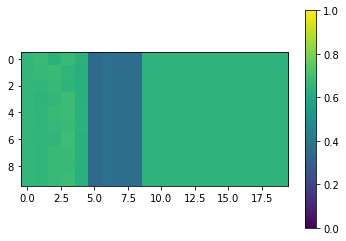

In [24]:
from numpy import unravel_index
acc_max_idx = unravel_index(acc.argmax(), acc.shape)
print(acc_max_idx)
print(acc[acc_max_idx[0], acc_max_idx[1]])


c_star = C_range[acc_max_idx[0]]
order_star = acc_max_idx[1]

print("c_star = ", c_star, ", order_star = ", order_star)


fig = plt.figure()
fig.clf()
ax = fig.add_subplot(1,1,1)
img = ax.imshow(acc, interpolation='nearest', vmin=0.0, vmax=1.0)
fig.colorbar(img)

plt.show()

plot data and boundary

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

No handles with labels found to put in legend.


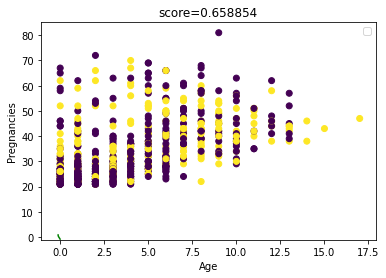

In [26]:
fig = plt.figure()

u = np.linspace(-1.1, 1.1, 50)
v = np.linspace(-1.1, 1.1, 50)

poly = PolynomialFeatures(order_star)
Xmap = poly.fit_transform(X)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=c_star).fit(Xmap, y)
theta_star =  clf.coef_[0]     


boundary_green = get_boundary(u, v, theta_star, order_star)

plt.title('score=%f' %clf.score(Xmap, y))
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.scatter(X1,X2, c=y.ravel())
plt.contour(u, v, boundary_green, 0, colors='green')
plt.legend()
plt.show()